Submission notebook for the JanataHack: Machine Learning for Banking

* Public rank :
* Private leaderboard rank : 

Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [0]:
Dataset_train=pd.read_csv('/content/train_fNxu4vz.csv')
Dataset=pd.read_csv('/content/test_fjtUOL8.csv')

Dataset=pd.concat([Dataset_train, Dataset], axis=0, ignore_index=True, sort=False)

#  Data preprocessing
*  converting into appropriate data types
*  Log transformation wherever found neccessary
*  Fill nans with mean (numeric)
*  Fill nans with mode (category) or you can use 'Unknown' label as well
*  Label encoding / one hot encoding for category columns

In [0]:
## all combined into one cell but one should go column by column to see how 
Dataset['Loan_Amount_Requested']=Dataset['Loan_Amount_Requested'].str.replace("," ,'')

Dataset['Loan_Amount_Requested']=Dataset['Loan_Amount_Requested'].astype(int)

Dataset['Loan_Amount_Requested'].describe()

Dataset['Loan_Amount_Requested']=np.log(Dataset['Loan_Amount_Requested'])

Dataset['Months_Since_Deliquency'].describe()

Dataset['Months_Since_Deliquency']=np.log(Dataset['Months_Since_Deliquency'], where = Dataset['Months_Since_Deliquency']!=0)

Dataset['Annual_Income'].describe()

Dataset['Annual_Income']=np.log(Dataset['Annual_Income'])

Dataset['Number_Open_Accounts'].describe()

Dataset['Number_Open_Accounts']=np.log(Dataset['Number_Open_Accounts'], where = Dataset['Number_Open_Accounts']!=0)


Dataset['Total_Accounts']=np.log(Dataset['Total_Accounts'])

Dataset['Home_Owner'].fillna('unknown', inplace=True)

Dataset['Length_Employed']=Dataset['Length_Employed'].str.replace('years', '')

Dataset['Length_Employed']=Dataset['Length_Employed'].replace('1 year', 1)

Dataset['Length_Employed']=Dataset['Length_Employed'].replace('10+ ', 11)

Dataset['Length_Employed']=Dataset['Length_Employed'].replace('< 1 year', 0)

Dataset['Length_Employed'].fillna(21, inplace=True)

Dataset['Length_Employed']=Dataset['Length_Employed'].astype(int)

label_encode=LabelEncoder()

Dataset['Gender']=label_encode.fit_transform(Dataset['Gender'])

Dataset['Purpose_Of_Loan'].value_counts()

Dataset['Purpose_Of_Loan']=Dataset['Purpose_Of_Loan'].map({'debt_consolidation':1, 'credit_card':2,
                                                           'home_improvement':3, 'other':4,
                                                           'major_purchase':5, 'small_business':6,
                                                           'car':7, 'medical':8, 
                                                           'moving':9, 'vacation':10,
                                                           'wedding':11, 'house':12,
                                                           'renewable_energy':13, 'educational':14})

In [0]:
Dataset=pd.get_dummies(Dataset, columns=['Home_Owner', 'Income_Verified'], drop_first=True)

In [44]:
Dataset.isnull().sum()
Dataset.shape

(273850, 19)

# Creating X and Y 

*  We have different datasets for different features combo . We chose Dataset_try1 because it gave the best f1 score  

 Lets try adding features to dataset .Following are the features that we have tried.

* Open account ratio
*  Closed account ratio 


In [45]:
Dataset['Account_ratio']=Dataset['Number_Open_Accounts']/Dataset['Total_Accounts']
Dataset.head(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Home_Owner_unknown,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Account_ratio
0,10000001,8.853665,0,11.127263,7,18.37,0,NaN,2.197225,2.639057,0,1.0,0,0,0,1,0,0,1,0.832579
1,10000002,10.308953,4,NaN,1,14.93,0,2.833213,2.484907,3.178054,0,3.0,0,0,0,0,0,0,0,0.781896
2,10000003,10.115570,7,11.232767,1,15.88,0,NaN,2.484907,2.772589,1,3.0,0,0,0,0,0,1,0,0.896241
3,10000004,9.680344,0,10.935960,1,14.34,3,NaN,2.772589,3.091042,1,3.0,0,0,0,0,1,1,0,0.896975
4,10000005,9.740969,8,11.472103,1,22.17,1,NaN,2.944439,3.401197,0,1.0,0,0,1,0,0,1,0,0.865707


In [46]:
# addition of feature closed account ratio
## closed account ratio
Dataset_try1 = Dataset.copy()
Dataset_try1['closed_account_ratio'] = 1 - Dataset_try1['Account_ratio']
Dataset_try1.head(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Home_Owner_unknown,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Account_ratio,closed_account_ratio
0,10000001,8.853665,0,11.127263,7,18.37,0,NaN,2.197225,2.639057,0,1.0,0,0,0,1,0,0,1,0.832579,0.167421
1,10000002,10.308953,4,NaN,1,14.93,0,2.833213,2.484907,3.178054,0,3.0,0,0,0,0,0,0,0,0.781896,0.218104
2,10000003,10.115570,7,11.232767,1,15.88,0,NaN,2.484907,2.772589,1,3.0,0,0,0,0,0,1,0,0.896241,0.103759
3,10000004,9.680344,0,10.935960,1,14.34,3,NaN,2.772589,3.091042,1,3.0,0,0,0,0,1,1,0,0.896975,0.103025
4,10000005,9.740969,8,11.472103,1,22.17,1,NaN,2.944439,3.401197,0,1.0,0,0,1,0,0,1,0,0.865707,0.134293


In [0]:
# Using Dataset_try1 with one more feature
Dataset_test=Dataset_try1[Dataset_try1['Interest_Rate'].isnull()==True]
Dataset=Dataset_try1[Dataset_try1['Interest_Rate'].isnull()!=True]

In [0]:
# Dataset_test=Dataset[Dataset['Interest_Rate'].isnull()==True]
# Dataset=Dataset[Dataset['Interest_Rate'].isnull()!=True]

In [0]:
X=Dataset.drop(['Interest_Rate', 'Loan_ID'], axis=1)
Y=Dataset['Interest_Rate']


X=X.iloc[:, :].values
Y=Y.iloc[:].values

imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

X[:, 2:3]=imputer.fit_transform(X[:, 2:3])

X[:, 6:7]=imputer.fit_transform(X[:, 6:7])


In [0]:
#rc=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=10, n_jobs=-1, random_state=100)
#rc.fit(X_train,Y_train)
#Y_predict=rc.predict(X_test)

#print(f1_score(Y_test,Y_predict, average='weighted'))


In [51]:
pd.DataFrame(X).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [0]:


# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

# lg=LGBMClassifier(boosting_type='gbdt', max_depth=14, learning_rate=0.14, objective='multiclass', reg_alpha=0,
#                   reg_lambda=1, n_jobs=-1, random_state=100, n_estimators=600)

# lg.fit(X_train,Y_train)
# Y_predict=lg.predict(X_test)

# print(f1_score(Y_test,Y_predict, average='weighted'))



In [0]:
lg=LGBMClassifier(boosting_type='gbdt', max_depth=14, learning_rate=0.14, objective='multiclass', reg_alpha=0,
                  reg_lambda=1, n_jobs=-1, random_state=100, n_estimators=600)

In [54]:
X_main_test=Dataset_test.drop(['Interest_Rate', 'Loan_ID'], axis=1)

X_main_test=X_main_test.iloc[:, :].values

X_main_test[:, 2:3]=imputer.fit_transform(X_main_test[:, 2:3])

X_main_test[:, 6:7]=imputer.fit_transform(X_main_test[:, 6:7])

pd.DataFrame(X_main_test).isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [0]:
# Y_test_predict=lg.predict(X_main_test)

# sample_submission=pd.read_csv('C:/Users/UF145GV/Documents/DL/testing/Bank Statement/sample_submission_HSqiq1Q.csv')
# sample_submission['Interest_Rate']=Y_test_predict

# sample_submission.to_csv('C:/Users/UF145GV/Documents/DL/testing/Bank Statement/main_test.csv', index=False)

# Cross validation and base score comparisons
* 10 kfold with shuffle 
* each fold creates a prediction which is stored in results[]
* the results are converted into a dataframe which is used get our final prediction

In [56]:
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)
X_main_test=pd.DataFrame(X_main_test)

kf=KFold(n_splits=10, random_state=100, shuffle=True)

y_test_predict=0
f1_score1 = 0
j=1
result={}
for i, (train_index, test_index) in enumerate(kf.split(Dataset)):
    
   Y_train, Y_valid = Y.iloc[train_index], Y.iloc[test_index]
   X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
   
   print( "\nFold ", j)
    
   model=lg.fit(X_train,Y_train)
   pred = model.predict(X_valid)
   
   print(f1_score(Y_valid,pred, average='weighted'))
   f1_score1+=f1_score(Y_valid,pred, average='weighted')
    
   y_test_predict+=model.predict(X_main_test)  
   result[j]=model.predict(X_main_test)
   j+=1
   
    
results=y_test_predict/10   
results=np.round(results, decimals=0)
print(f1_score1/10)

d = pd.DataFrame()
for i in range(1, 11):
    d = pd.concat([d,pd.DataFrame(result[i])],axis=1)
d.columns=['1','2','3','4','5','6','7','8','9','10']




Fold  1


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5304216741210254

Fold  2
0.531655500605383

Fold  3
0.536413350122969

Fold  4
0.5404335947392582

Fold  5
0.5360273595521782

Fold  6
0.5383911660107997

Fold  7
0.5311902481251548

Fold  8
0.5306327030861933

Fold  9
0.5397697189931273

Fold  10
0.5224263766786057
0.5337361692034694


# Submission strategy
* Take mode from all the folds used for prediction

In [0]:
re = d.mode(axis=1)[0]
sample_submission=pd.read_csv('/content/sample_submission_HSqiq1Q.csv')
sample_submission['Interest_Rate']=re

sample_submission.to_csv('/content/sample_submission_highest_score_check.csv', index=False)

Execute till above to get the final score

# Feature importances

Plotting feature importances plot . This is the plot that was used to create extra features.

In [75]:
lg.feature_importances_

array([8614, 3155, 7464, 2693, 8323, 1845, 4451, 2784, 4719,  590,    0,
         23,  271,  633,  372,  617,  644, 4938, 1864])

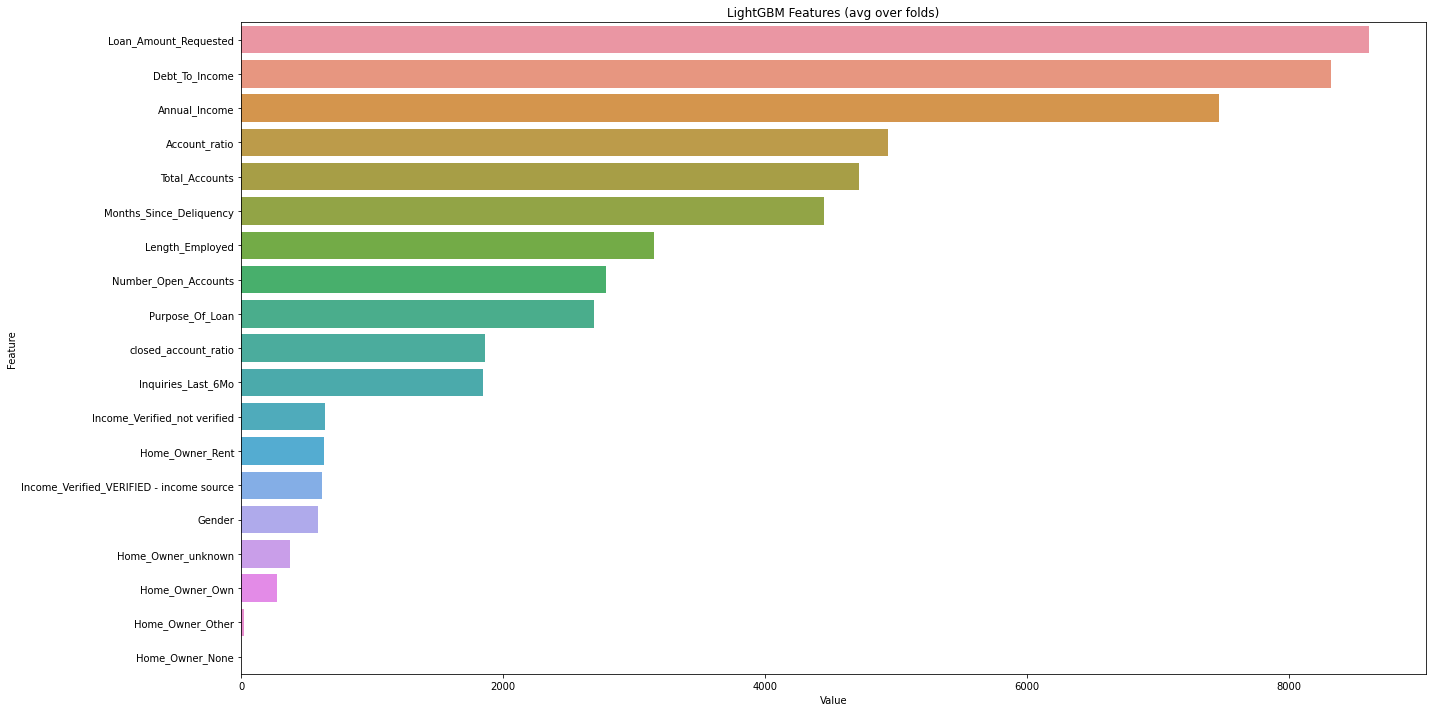

<Figure size 432x288 with 0 Axes>

In [78]:

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
Dataset_plot = Dataset.drop(['Loan_ID','Interest_Rate'],axis = 1)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lg.feature_importances_,Dataset_plot.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')